In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import cftime
import intake
import fsspec
import numpy as np
import pandas as pd
import seaborn as sb
import xarray as xr

import fv3viz as viz
from vcm.catalog import catalog

def weighted_average(array, weights, axis=None):
    return np.nansum(array * weights, axis=axis) / np.nansum(weights, axis=axis)

In [2]:
with fsspec.open("gs://vcm-ml-public/argo/prog-report-2021-05-14-nn-rf-40day/NN-ensemble-median/diags.nc", "rb") as f:
    diags_nn = xr.open_dataset(f).load()
    
with fsspec.open("gs://vcm-ml-public/argo/prog-report-2021-05-14-nn-rf-40day/RF/diags.nc", "rb") as f:
    diags_rf = xr.open_dataset(f).load()
    
with fsspec.open("gs://vcm-ml-public/argo/prog-report-2021-05-14-nn-rf-40day/baseline/diags.nc", "rb") as f:
    diags_baseline = xr.open_dataset(f).load()
    
    

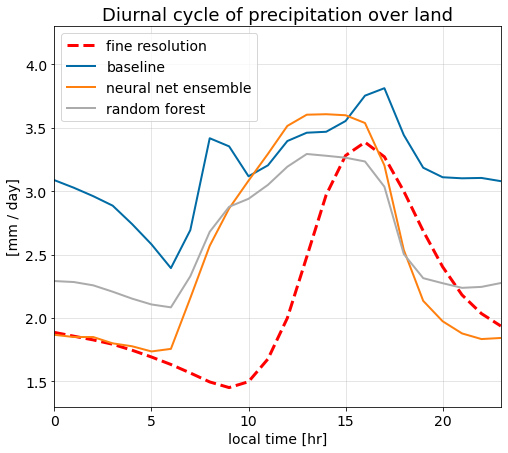

In [4]:
var = 'total_precip_to_surface_diurnal_land'

labels = ["baseline", "neural net ensemble", "random forest"]
datasets = [diags_baseline, diags_nn, diags_rf]

verif_land_precip_diurnal = diags_baseline[var] - diags_baseline['diurn_bias_total-precipitation_diurnal_land']

fig = plt.figure(figsize=(8,7))

verif_land_precip_diurnal.plot(label="fine resolution", linestyle="--", color="red", linewidth=3)
for label, ds in zip(labels, datasets):
    ds[var].plot(label=label, linewidth=2)

plt.legend(fontsize=14)
plt.grid(True, axis="both", alpha=0.4)
plt.xlim(0, 23)
plt.ylim(1.3, 4.3)
plt.xlabel("local time [hr]", fontsize=14)
plt.ylabel("[mm / day]", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title("Diurnal cycle of precipitation over land", fontsize=18)
fig.savefig("figures/diurnal_cycle_land_precip.png")